___
# MINIPROJETO 1

## <font color='red'>Sabrina Sampaio Simão</font>
___

## <font color='blue'>Notas de escolas americanas no SAT</font>

___
### Itens 1 a 3 - Resolução:

In [214]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import scipy.stats as s

print('Esperamos trabalhar no diretório')
print(os.getcwd())

Esperamos trabalhar no diretório
C:\Users\sabri\Documents\GitHub\CD\MiniProjeto1


In [215]:
dados = pd.read_csv("SAT.csv")

### <font color = orange> Será feita a soma das 3 notas do SAT: Leitura, Matemática e Escrita, e serão plotadas em uma nova coluna. Todas as 4 notas serão avaliadas pelos histogramas, mas antes, uma limpeza será feita na tabela!</font color>

In [216]:
dados['SOMA'] = dados.CRM + dados.MM + dados.WM
dados

,DBN,School Name,Number of Test Takers,CRM,MM,WM,SOMA
0,01M292,Henry Street School for International Studies,31,391,425,385,1201
1,01M448,University Neighborhood High School,60,394,419,387,1200
2,01M450,East Side Community High School,69,418,431,402,1251
3,01M458,SATELLITE ACADEMY FORSYTH ST,26,385,370,378,1133
4,01M509,CMSP HIGH SCHOOL,0,NaN,NaN,NaN,NaN
5,01M515,Lower East Side Preparatory High School,154,314,532,314,1160
6,"01M539,""New Explorations into Sci, Tech and Ma...",NaN,NaN,NaN,NaN,NaN,NaN
7,01M650,CASCADES HIGH SCHOOL,35,411,401,401,1213
8,01M696,BARD HIGH SCHOOL EARLY COLLEGE,138,630,608,630,1868
9,02M047,AMERICAN SIGN LANG ENG DUAL,11,405,415,385,1205


In [217]:
sat = dados.iloc[:,3:]

### <font color = purple> Os 4 histogramas abaixo aparentam ter distribuição de Weibull, mas um pode falar que algumas se parecem com curvas normais</font color>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001A96E6EC198>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001A96ADC6940>]], dtype=object)

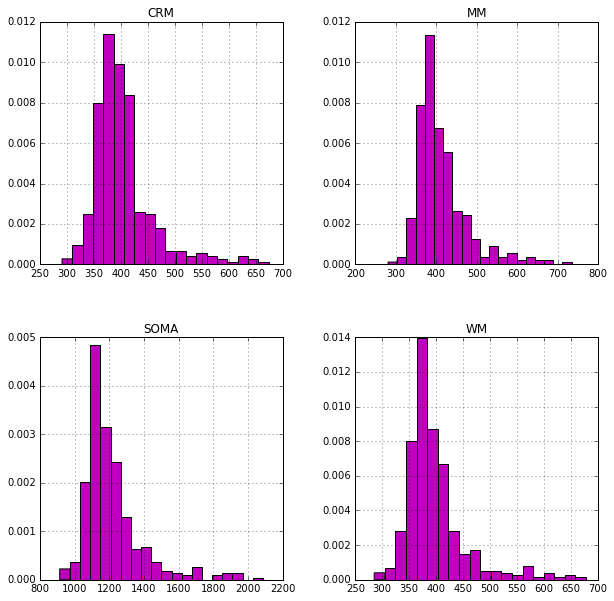

In [218]:
sat.hist(figsize=(10,10), color='m', normed=True, bins=20)

In [219]:
sat.mode()

,CRM,MM,WM,SOMA
0,385,358,364,1108
1,393,369,368,1136
2,416,385,NaN,NaN


In [220]:
sat.median()

CRM      392.5
MM       394.5
WM       383.0
SOMA    1170.0
dtype: float64

In [221]:
sat.mean()

CRM      404.073684
MM       412.660526
WM       397.489474
SOMA    1214.223684
dtype: float64

### <font color = purple> Quando a Media > Mediana > Moda temos uma Assimetria Positiva <font color>

### <font color = purple> Como vamos trabalhar sempre com a soma total das notas, temos como FDP's possiveis: Distribuição de Rayleigh ou Distribuição de Weibull. Ambas distribuições começam crescendo rapidamente e, após atingirem o pico, decrescem mais lentamente do que antes. Não considerei a de Poisson pois os dados não são discretos.<font color>

___
### Itens 4 a 6 - Resolução:

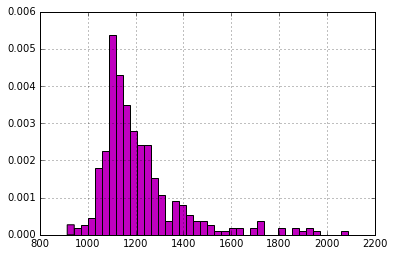

In [222]:
SOMA1 = sat.SOMA
soma = SOMA1.dropna()
soma.hist(normed=True, color="m", bins=40)

In [223]:
a = s.alpha.fit(soma)
a1,loc,scale = s.alpha.fit(soma)

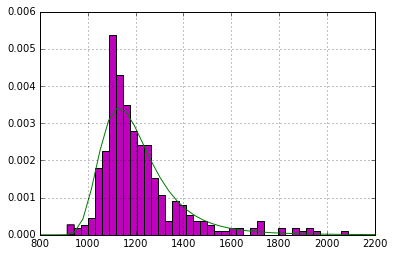

In [224]:
x = np.linspace(800, 2200, 40)
ap = s.alpha.pdf(x, a1,loc,scale)
soma.hist(normed=True, color="m", bins=40)
plt.plot(x, ap, '-', color='green', label="Alpha") 

In [265]:
s.maxwell.fit(soma)

(859.64772145035363, 227.97724564587574)

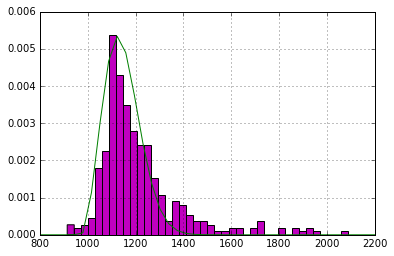

In [275]:
x = np.linspace(800, 2200, 40)
bp = s.maxwell.pdf(x,970,110)
soma.hist(normed=True, color="m", bins=40)
plt.plot(x, bp, '-', color='green', label="Alpha") 

In [276]:
s.gengamma.fit(soma)

(21.83609496253672,
 0.48250049693899899,
 869.16535505489173,
 0.54911627410642794)

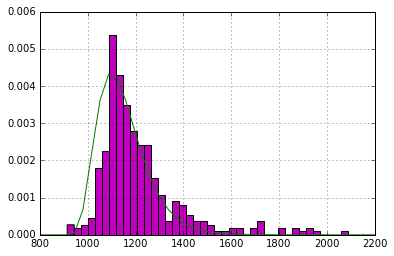

In [301]:
x = np.linspace(800, 2200, 40)
bp = s.gengamma.pdf(x,21,0.522,900,0.7)
soma.hist(normed=True, color="m", bins=40)
plt.plot(x, bp, '-', color='green', label="Alpha") 

## É impossível achar a função perfeita para este DataFrame. Testei uma por uma, todas as funções do Scipy, e o fit de nenhuma faz um gráfico descente. Mesmo alterando os parâmetros para ficarem mais aceitaveis, o Q-Q Plot não fica equilibrado, havendo muita diferença entre os valores.

___
### Itens 7 a 9 - Resolução:

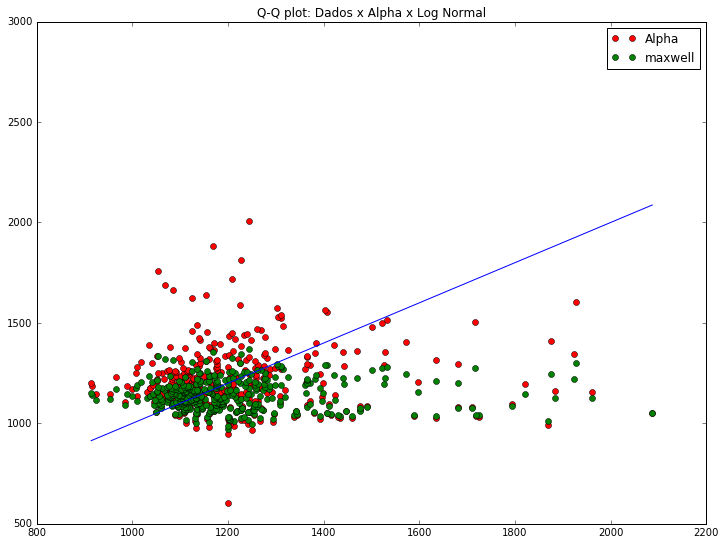

In [305]:
fra = [] 
for i in range(len(soma)):
    acc = (i - 0.5) / len(soma)
    if acc < 0:
        acc = 0
    fra.append(acc)


fra = pd.Series(data=fra)

q_alpha = s.alpha.ppf(fra, a1,loc,scale) 
q_maxwell = s.maxwell.ppf(fra, 970,110)


fig = plt.figure(figsize=(12,9))

plt.title("Q-Q plot: Dados x Alpha x Log Normal")

    

ap_plot, = plt.plot(soma, q_alpha, 'o', color="red", label="Alpha")
mx_plot, = plt.plot(soma, q_maxwell, 'o', color="green", label = "maxwell")
axes = plt.gca()
axes.set_ylim([500,3000])

plt.legend(handles=[ap_plot, mx_plot])
plt.plot((min(soma), max(soma)), (min(soma), max(soma)), '-')


### Este Q-Q Plot não é dos melhores, mas o problema no caso é o conjunto de dados que é difícil de analisar por pdfs. Além disso, o erro quadrático abaixo mostra a discrepância dos valores.
Disclaimer: foram testatos praticamente todos os modelos do Scipy e nenhum ficou melhor que isto

In [308]:
erro_quadratico_alpha = sum((soma - q_alpha)**2)
erro_quadratico_maxwell = sum((soma - q_maxwell)**2)

print("Erro quadrático da alpha :{:4.3f}\n".format(erro_quadratico_alpha))
print("Erro quadrático da maxwell :{:4.3f}\n".format(erro_quadratico_maxwell))


Erro quadrático da alpha :19548877.783

Erro quadrático da maxwell :15097439.115



### Se possível, os dados que possuem não ficam bem representados por nenhuma pdf disponível. Uma exceção talvez pudesse ser a scipy.kappa4, mas ela não existe na versão usada neste projeto, portanto foi uma das únicas a não ser testada.
#### Todos eles conseguiram fazer uma boa curva sob o histograma, alguns com parametros alterado

In [310]:
#res = s.relfreq(soma, numbins=40)
#res.frequency

In [309]:
#fig = plt.figure(figsize=(5, 4))
#ax = fig.add_subplot(1, 1, 1)
#ax.bar(x, res.frequency, width=res.binsize)
#ax.set_title('Relative frequency histogram')
#ax.set_xlim([x.min(), x.max()])

___
### Itens 10 e 11 - Resolução: